<a href="https://colab.research.google.com/github/satyaprasadnaidu/COVID19_Data_Analysis/blob/main/COVID19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [ ]:
import pandas as pd
df = pd.read_csv("/content/owid-covid-data.txt")


In [ ]:
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [ ]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop rows with no country info
df = df[df['location'].notna()]

# Fill or handle missing values
df.fillna(0, inplace=True)  # Or use df.interpolate() for numeric fields


In [ ]:
india_df = df[df['location'] == 'India']
india_df[['date', 'total_cases', 'total_deaths', 'total_vaccinations']].tail()


,date,total_cases,total_deaths,total_vaccinations
175226,2024-08-08,0.0,0.0,2.206868e+09
175227,2024-08-09,0.0,0.0,2.206868e+09
175228,2024-08-10,0.0,0.0,2.206868e+09
175229,2024-08-11,0.0,0.0,2.206868e+09
175230,2024-08-12,0.0,0.0,2.206868e+09


In [ ]:
Afghanistan_df = df[df['location'] == 'Afghanistan']
Afghanistan_df[['date', 'total_cases', 'total_deaths', 'total_vaccinations']].tail()

,date,total_cases,total_deaths,total_vaccinations
1669,2024-07-31,235214.0,7998.0,0.0
1670,2024-08-01,235214.0,7998.0,0.0
1671,2024-08-02,235214.0,7998.0,0.0
1672,2024-08-03,235214.0,7998.0,0.0
1673,2024-08-04,235214.0,7998.0,0.0


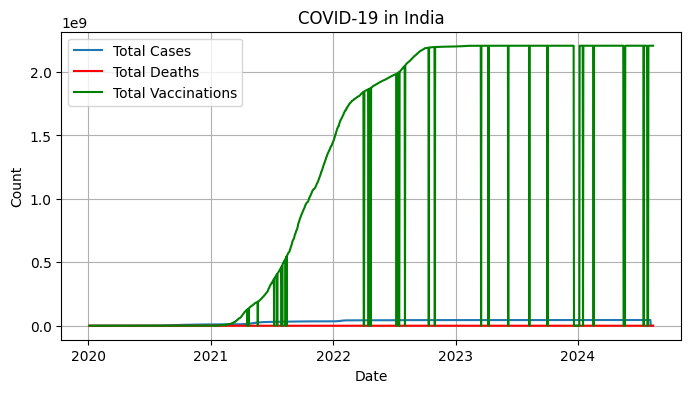

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(india_df['date'], india_df['total_cases'], label='Total Cases')
plt.plot(india_df['date'], india_df['total_deaths'], label='Total Deaths', color='red')
plt.plot(india_df['date'], india_df['total_vaccinations'], label='Total Vaccinations', color='green')
plt.title("COVID-19 in India")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


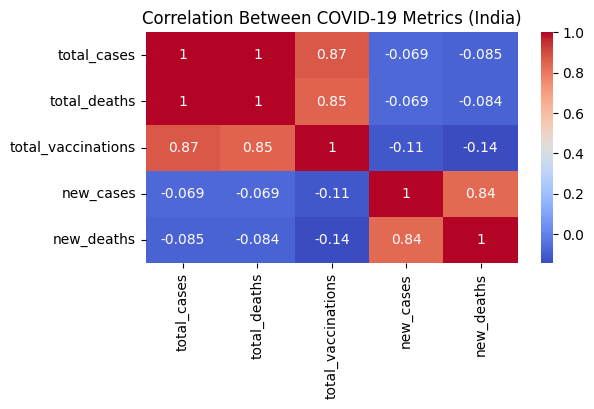

In [ ]:
# Use a subset of numeric features for heatmap
numeric_df = india_df[['total_cases', 'total_deaths', 'total_vaccinations', 'new_cases', 'new_deaths']]
plt.figure(figsize=(6,3))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between COVID-19 Metrics (India)")
plt.show()


### *Daily New Cases Line Plot

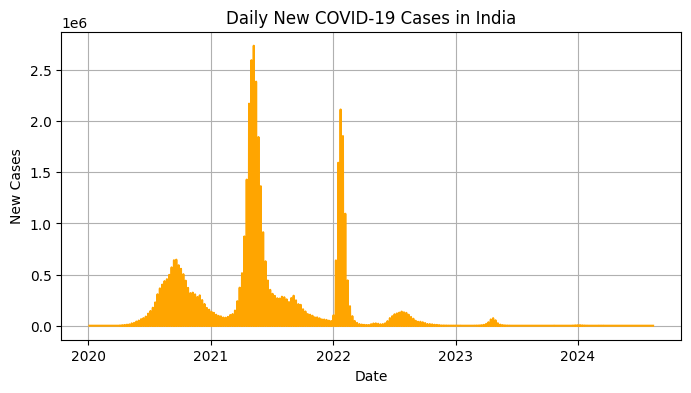

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(india_df['date'], india_df['new_cases'], color='orange')
plt.title("Daily New COVID-19 Cases in India")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid(True)
plt.show()


### *Deaths vs Vaccination Scatter Plot

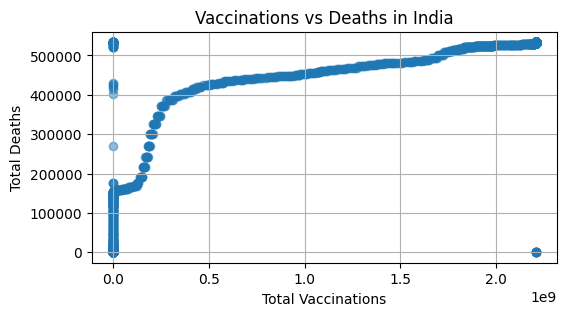

In [ ]:
plt.figure(figsize=(6,3))
plt.scatter(india_df['total_vaccinations'], india_df['total_deaths'], alpha=0.5)
plt.title("Vaccinations vs Deaths in India")
plt.xlabel("Total Vaccinations")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.show()


## 📌 Insights:
- India saw exponential case growth in mid-2021.
- Vaccination rollout began significantly in mid-2021 and helped flatten the case curve.
- Total deaths correlate strongly with total cases, but vary by country due to healthcare.
- Countries like the USA, India, and Brazil have the highest case counts.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
